# Unsupervised Learning Clustering using K-Means

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Loading Data

In [2]:
data = pd.read_csv(filepath_or_buffer = r'C:\Users\theer\Desktop\Machine Learning\Data\force2020_data_unsupervised_learning.csv', index_col= 'DEPTH_MD')
data

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
494.528,1.884186,80.200851,NaN,20.915468,161.131180
494.680,1.889794,79.262886,NaN,19.383013,160.603470
494.832,1.896523,74.821999,NaN,22.591518,160.173615
494.984,1.891913,72.878922,NaN,32.191910,160.149429
495.136,1.880034,71.729141,NaN,38.495632,160.128342
...,...,...,...,...,...
3271.416,2.630211,19.418915,0.187811,NaN,NaN
3271.568,2.643114,21.444370,0.185574,NaN,NaN
3271.720,2.681300,22.646879,0.176074,NaN,NaN


In [3]:
data.isna().sum()

RHOB       0
GR         0
NPHI    4238
PEF     1830
DTC       81
dtype: int64

In [4]:
data.dropna(inplace=True)

## Overview Data

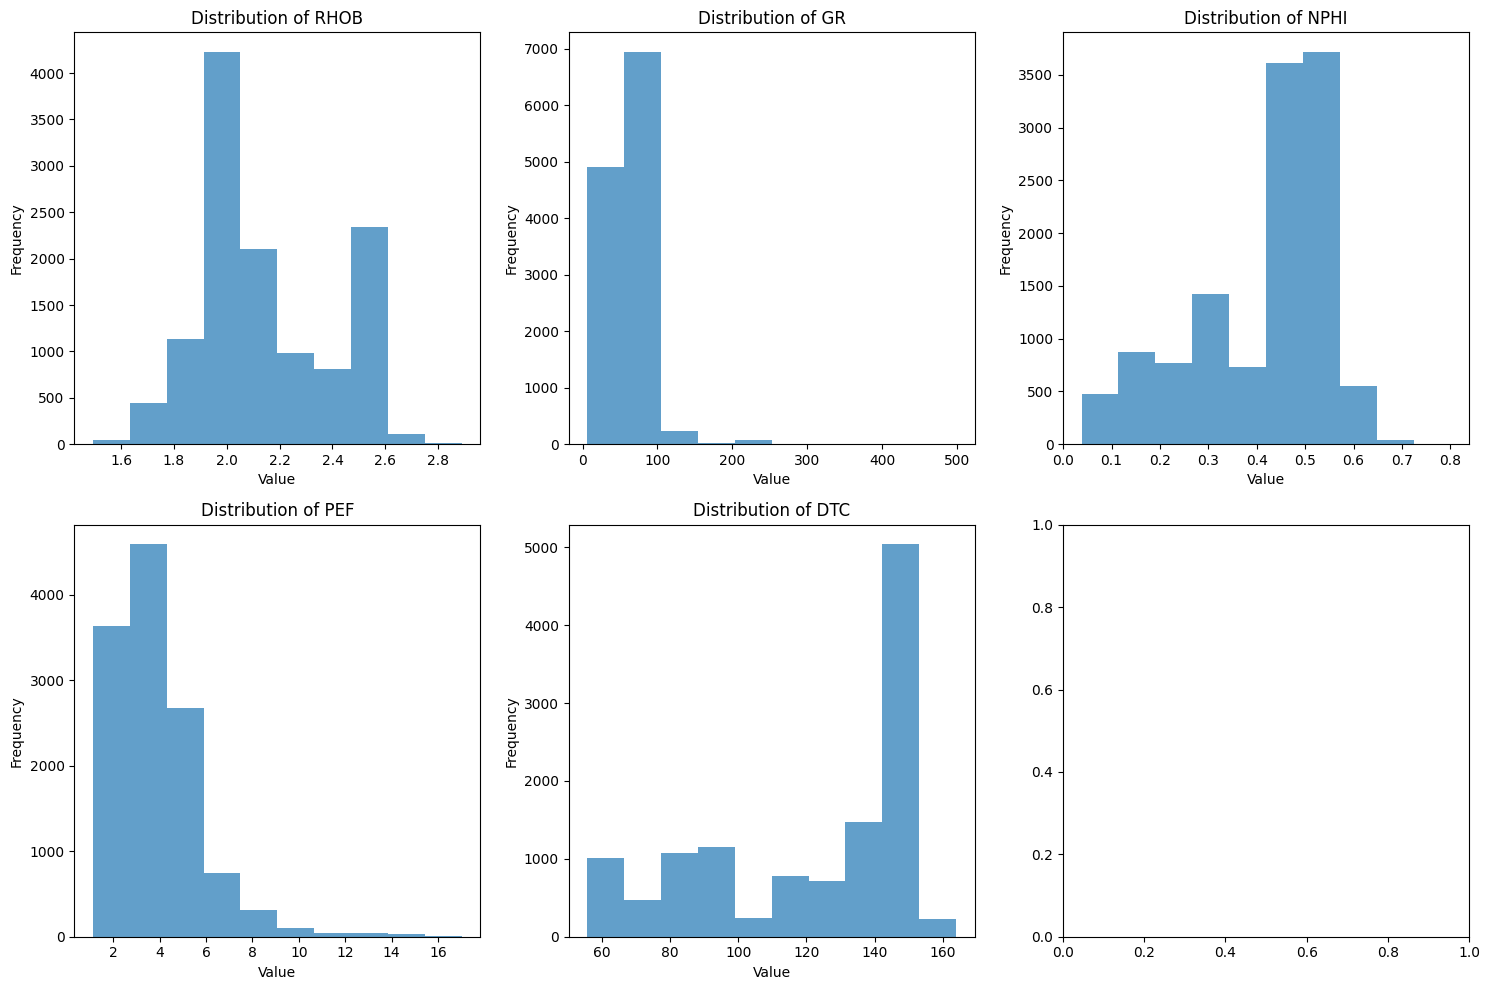

In [5]:
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot distribution of each column
for i, column in enumerate(data.columns):
    ax = axes[i]
    ax.hist(data[column], bins=10, alpha=0.7)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

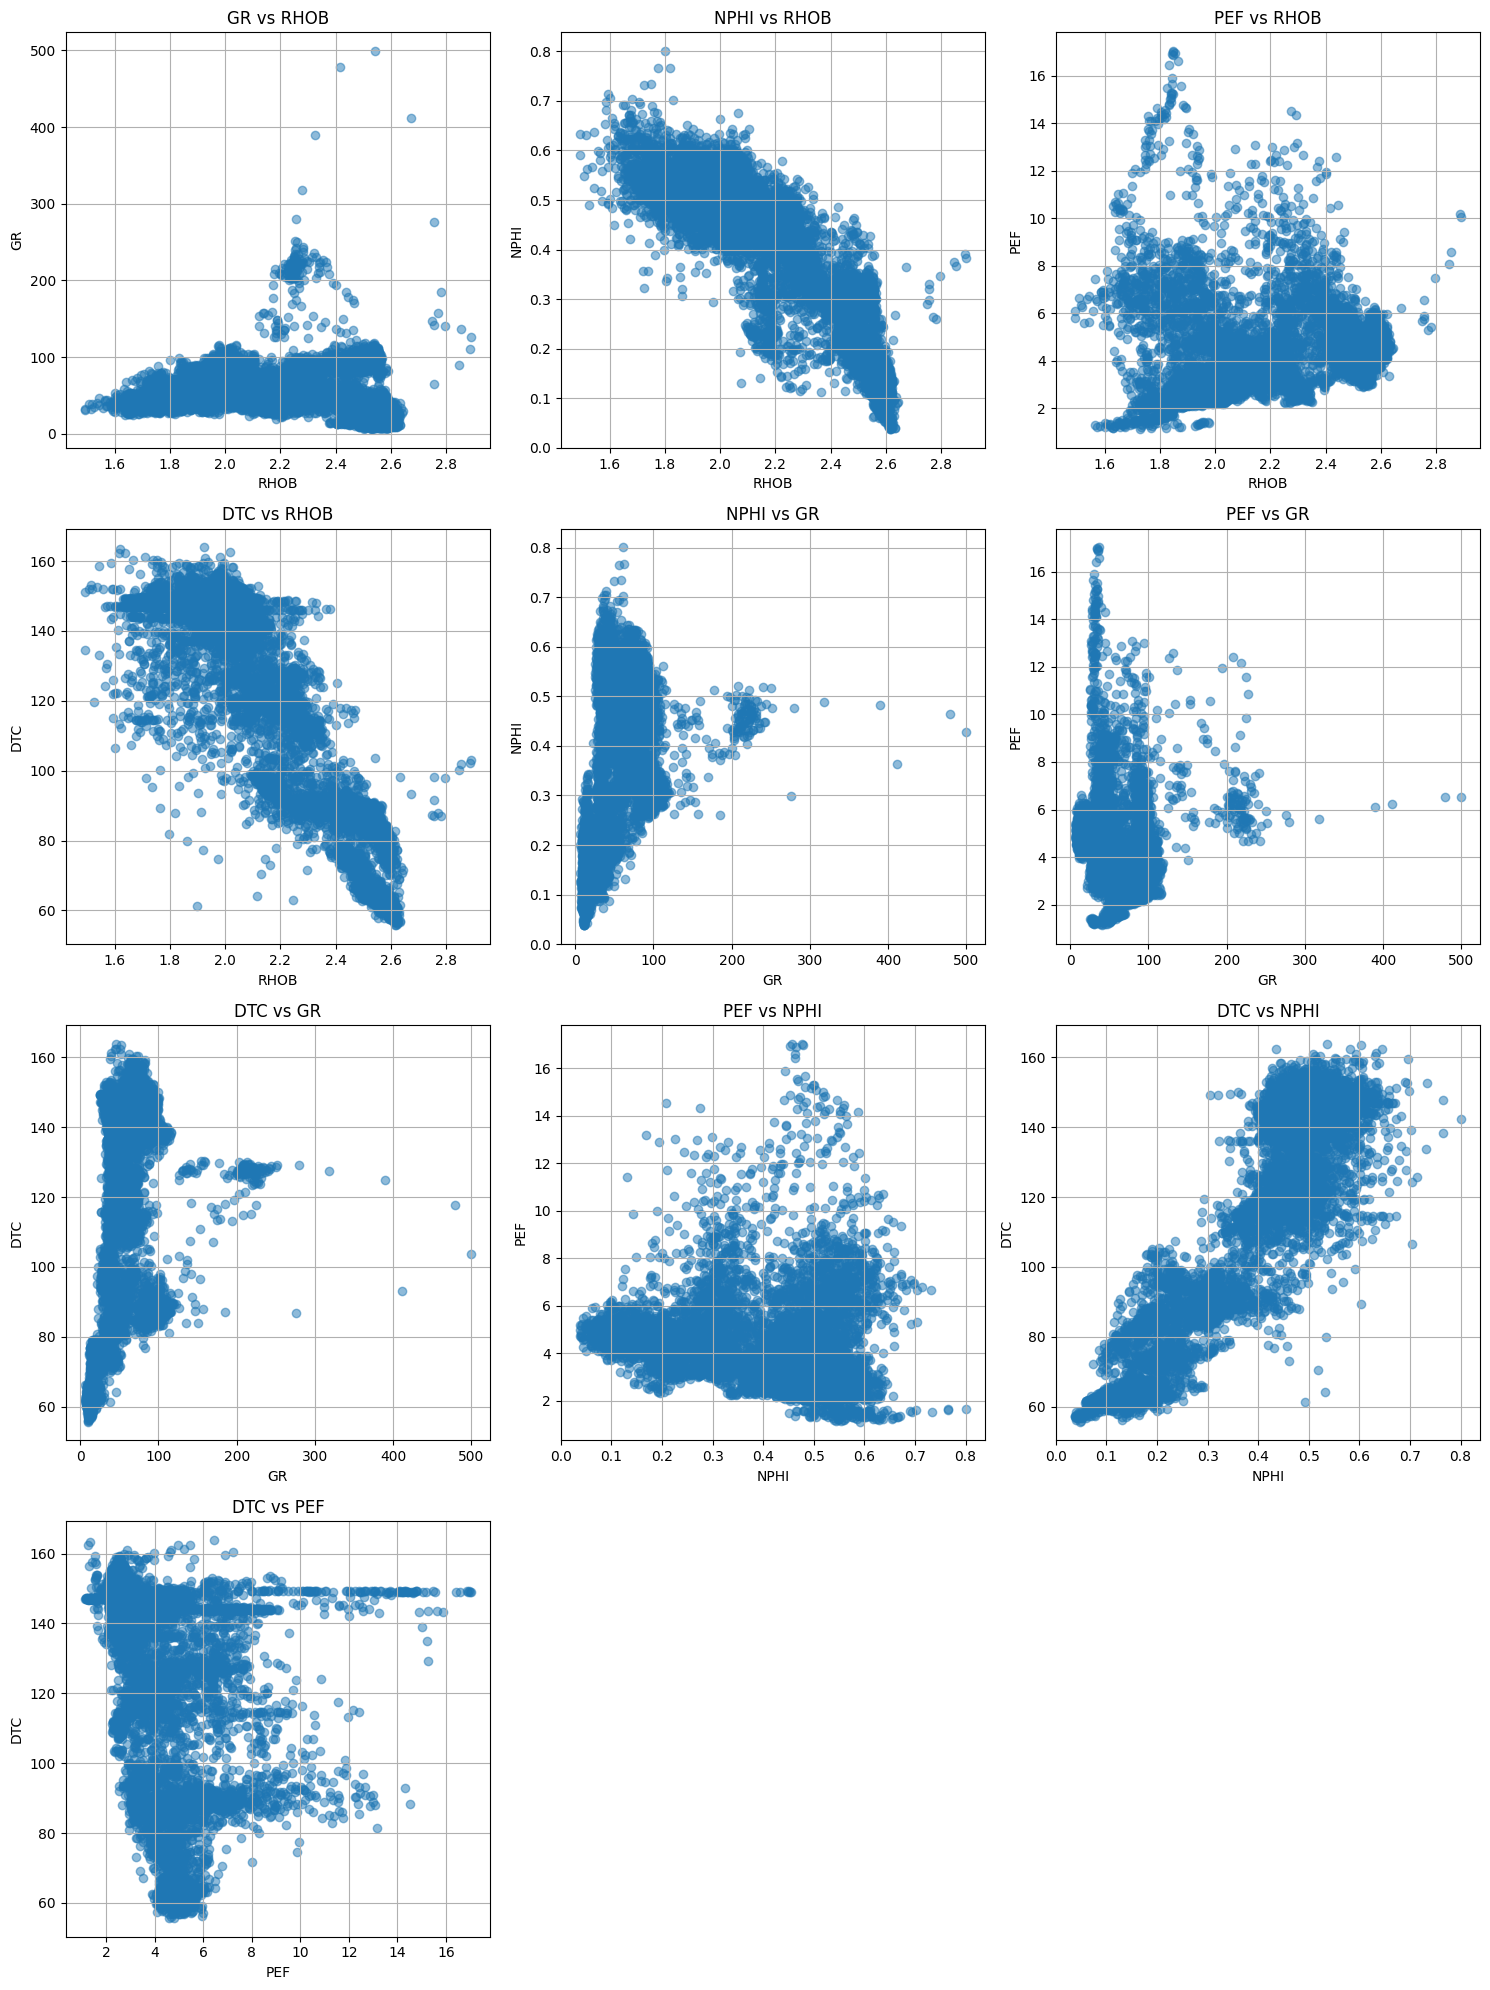

In [6]:
# Generate all possible combinations of scatter plots
combinations = list(itertools.combinations(data.columns, 2))

# Determine number of rows and columns for subplot layout
num_plots = len(combinations)
num_cols = 3  # Number of columns in subplot layout
num_rows = -(-num_plots // num_cols)  # Ceiling division to ensure all plots are accommodated

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()  # Flatten axes to handle both 1D and 2D cases

# Plot each combination
for i, combination in enumerate(combinations):
    x_column, y_column = combination
    ax = axes[i]  # Select current subplot
    ax.scatter(data[x_column], data[y_column], alpha=0.5)
    ax.set_title(f'{y_column} vs {x_column}')
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.grid(True)

# Hide any unused subplots
for j in range(num_plots, num_cols*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Data Preparation

In [7]:
data.describe()

,RHOB,GR,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,0.414572,3.912313,121.409905
std,0.251592,29.902708,0.139207,1.816933,30.394369
min,1.493417,6.191506,0.037976,1.126667,55.726753
25%,1.983767,42.792794,0.313797,2.629141,89.977041
50%,2.059335,62.886322,0.466891,3.365132,138.477173
75%,2.389839,77.726776,0.513840,4.686422,146.242302
max,2.889454,499.022583,0.800262,17.026619,163.910797


In [8]:
scalar = StandardScaler()

In [9]:
scaler_data = scalar.fit_transform(data)
scaler_data = pd.DataFrame(scaler_data, columns=data.columns)
scaler_data

,RHOB,GR,NPHI,PEF,DTC
0,-1.491843,-0.179292,2.523654,-1.255364,0.869531
1,-1.387067,-0.010859,2.770744,-1.247886,0.690042
2,-1.320646,0.028875,2.524300,-1.247450,0.554350
3,-1.274390,-0.008126,2.068584,-1.261572,0.585297
4,-1.335919,-0.092056,1.617342,-1.325067,0.752808
...,...,...,...,...,...
12197,1.265151,0.979338,-0.524699,0.433103,-1.149449
12198,1.222550,0.921870,-0.456081,0.433103,-1.158891
12199,1.110101,1.032560,-0.356250,0.433103,-1.105910
12200,1.095199,1.157682,-0.339430,0.722114,-1.095690


In [10]:
pd.DataFrame(scaler_data, columns=data.columns).describe()

,RHOB,GR,NPHI,PEF,DTC
count,1.220200e+04,1.220200e+04,1.220200e+04,1.220200e+04,1.220200e+04
mean,-5.217557e-16,7.453653e-17,-1.490731e-16,2.236096e-16,-6.708287e-16
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-2.609607e+00,-1.841459e+00,-2.705419e+00,-1.533222e+00,-2.161119e+00
25%,-6.605409e-01,-6.173961e-01,-7.239543e-01,-7.062589e-01,-1.034210e+00
50%,-3.601669e-01,5.459496e-02,3.758510e-01,-3.011687e-01,5.615503e-01
75%,9.535356e-01,5.509066e-01,7.131280e-01,4.260700e-01,8.170400e-01
max,2.939426e+00,1.464037e+01,2.770744e+00,7.218123e+00,1.398372e+00


## Clustering Data using K-Means

In [11]:
scaler_data.columns

Index(['RHOB', 'GR', 'NPHI', 'PEF', 'DTC'], dtype='object')

In [12]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

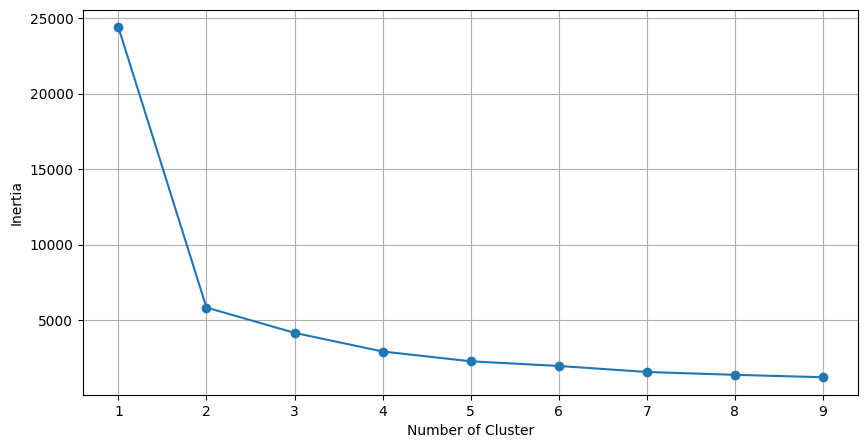

In [13]:
optimise_k_means(scaler_data[['RHOB', 'NPHI']], 10)

## Applying K Means Clustering

In [56]:
kmeans = KMeans(n_clusters=3, random_state=None)

In [57]:
kmeans.fit(scaler_data[['RHOB', 'NPHI']])

KMeans(n_clusters=3)

In [58]:
data['cluster'] = kmeans.labels_
data

,RHOB,GR,NPHI,PEF,DTC,cluster
DEPTH_MD,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,0
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,0
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,0
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,0
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,0
...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,2
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,2
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,2


In [45]:
scaler_data.columns

Index(['RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'cluster'], dtype='object')

## Ploting 

In [63]:
data

,RHOB,GR,NPHI,PEF,DTC,cluster
DEPTH_MD,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,0
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,0
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,0
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,0
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,0
...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,2
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,2
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,2


In [65]:
cluster_data

,RHOB,GR,NPHI,PEF,DTC,cluster
DEPTH_MD,,,,,,
2217.752,2.445054,27.726553,0.189671,5.979160,75.545822,1
2217.904,2.245012,26.727619,0.205042,5.704321,63.051907,1
2240.856,2.473634,30.298985,0.306025,4.443595,85.614174,1
2241.008,2.577276,21.741039,0.260712,4.669753,73.350395,1
2241.160,2.625614,18.633516,0.216781,4.402143,63.866356,1
...,...,...,...,...,...,...
2980.336,2.499734,102.263771,0.321738,3.682680,86.620888,1
2980.488,2.504729,101.754349,0.318226,3.724335,89.112709,1
2980.640,2.514735,97.205940,0.303585,3.990755,88.052017,1


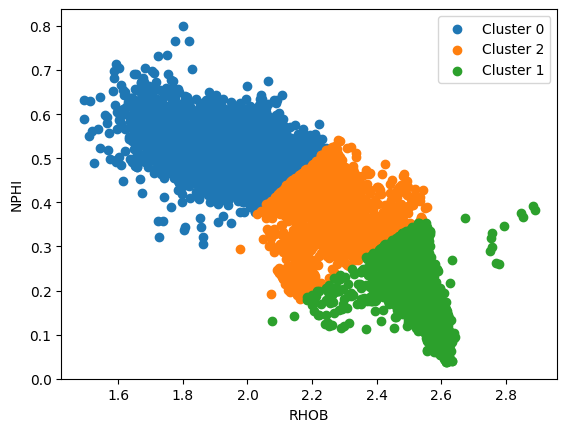

In [66]:
# Get unique cluster labels
unique_clusters = data['cluster'].unique()

# Plot each cluster separately
for cluster_label in unique_clusters:
    cluster_data = data[data['cluster'] == cluster_label]
    plt.scatter(x=cluster_data['RHOB'], y=cluster_data['NPHI'], label=f'Cluster {cluster_label}')

plt.xlabel('RHOB')
plt.ylabel('NPHI')
plt.legend()
plt.show()

## Multi Clastering

In [67]:
k = 6
for i in range(1,k+1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaler_data[['RHOB', 'NPHI']])
    data[f'Kmeans_{i}'] = kmeans.labels_

In [69]:
data

,RHOB,GR,NPHI,PEF,DTC,cluster,Kmeans_1,Kmeans_2,Kmeans_3,Kmeans_4,Kmeans_5,Kmeans_6
DEPTH_MD,,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,0,0,0,0,3,4,2
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,0,0,0,0,3,4,2
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,0,0,0,0,3,4,2
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,0,0,0,0,3,4,2
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,0,0,0,0,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,2,0,1,2,1,3,5
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,2,0,1,2,1,3,5
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,2,0,1,2,1,3,5


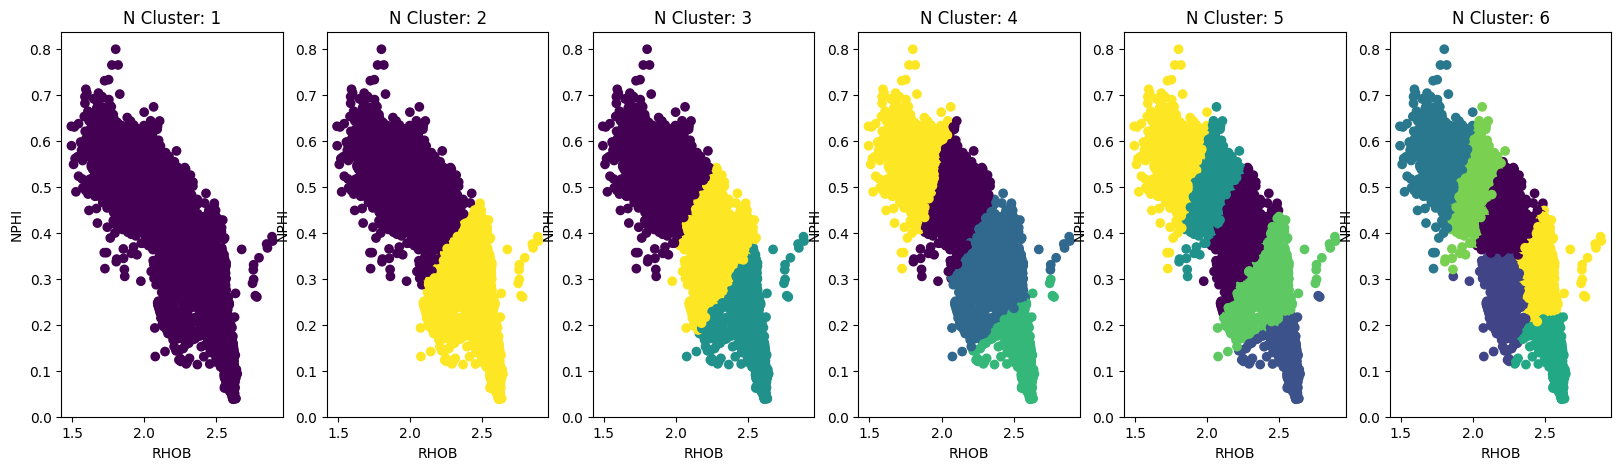

In [73]:
fig, axs = plt.subplots(nrows=1 , ncols=6, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=data['RHOB'], y=data['NPHI'], c=data[f'Kmeans_{i}'])
    ax.set_ylabel('NPHI')  
    ax.set_xlabel('RHOB') 
    ax.set_title(f'N Cluster: {i}')